In [ ]:
# Trying out quntileTransformer for nomrmalizing distributions

In [3]:
# Import Basis
import pandas as pd 
# import optuna
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
import math
from io import StringIO
from colorama import Fore, Style, init;
# Import necessary libraries
from IPython.display import display, HTML
from scipy.stats import skew  
# Import Plotly.go
import plotly.graph_objects as go
# import Subplots
from plotly.subplots import make_subplots
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Model Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler , StandardScaler , QuantileTransformer, PowerTransformer
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from catboost import CatBoostClassifier
from sklearn.metrics import *
# Classifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

C:\Anaconda3\envs\py3.9\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
train = pd.read_parquet('./data/test.parquet')
# train = pd.read_parquet('./data/train.parquet')
# test = pd.read_parquet('./data/test.parquet')

train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
id,,,,,,,,,,
11504798,Female,20,1,47,0,< 1 Year,No,2630,160,228
11504799,Male,47,1,28,0,1-2 Year,Yes,37483,124,123
11504800,Male,47,1,43,0,1-2 Year,Yes,2630,26,271
11504801,Female,22,1,47,1,< 1 Year,No,24502,152,115
11504802,Male,51,1,19,0,1-2 Year,No,34115,124,148


In [5]:
train.shape

(7669866, 10)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7669866 entries, 11504798 to 19174663
Data columns (total 10 columns):
 #   Column                Dtype   
---  ------                -----   
 0   Gender                category
 1   Age                   int8    
 2   Driving_License       int8    
 3   Region_Code           int8    
 4   Previously_Insured    int8    
 5   Vehicle_Age           category
 6   Vehicle_Damage        category
 7   Annual_Premium        int32   
 8   Policy_Sales_Channel  int16   
 9   Vintage               int16   
dtypes: category(3), int16(2), int32(1), int8(4)
memory usage: 168.2 MB


In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7669866.0,38.391369,14.999507,20.0,24.0,36.0,49.0,85.0
Driving_License,7669866.0,0.998021,0.044444,0.0,1.0,1.0,1.0,1.0
Region_Code,7669866.0,26.426614,12.994326,0.0,15.0,28.0,35.0,52.0
Previously_Insured,7669866.0,0.463077,0.498635,0.0,0.0,0.0,1.0,1.0
Annual_Premium,7669866.0,30465.525668,16445.864722,2630.0,25280.0,31827.0,39460.0,540165.0
Policy_Sales_Channel,7669866.0,112.364992,54.073585,1.0,29.0,151.0,152.0,163.0
Vintage,7669866.0,163.899577,79.984449,10.0,99.0,166.0,232.0,299.0


In [8]:
train.nunique()

Gender                      2
Age                        66
Driving_License             2
Region_Code                53
Previously_Insured          2
Vehicle_Age                 3
Vehicle_Damage              2
Annual_Premium          50044
Policy_Sales_Channel      151
Vintage                   290
dtype: int64

In [9]:
train.select_dtypes(include=['int8','int16','int32']).columns

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distribution(data, column):
    """
    Plot the distribution and density plot of a specified column in a DataFrame.

    Parameters:
    data (pd.DataFrame): The DataFrame containing the data.
    column (str): The column name to plot.

    Returns:
    None
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True, stat="density", linewidth=0)
    plt.title(f'Distribution and Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()


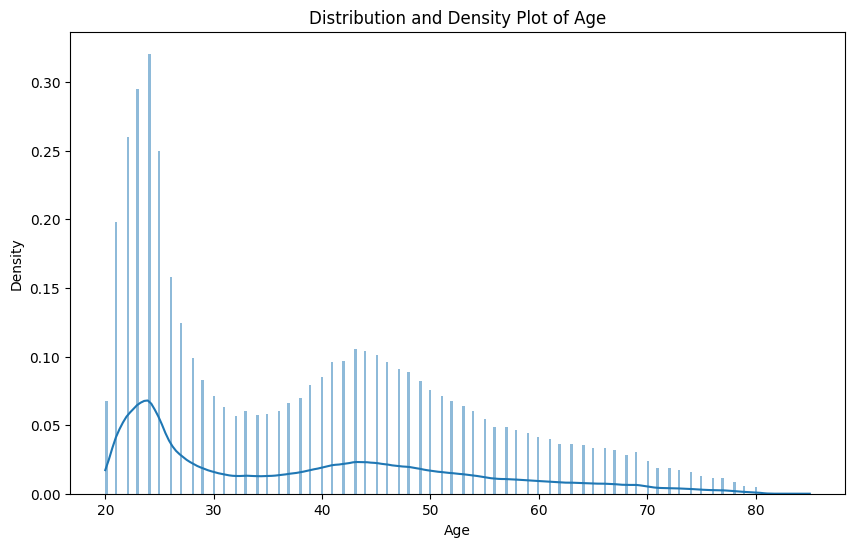

In [13]:
plot_distribution(train, 'Age')

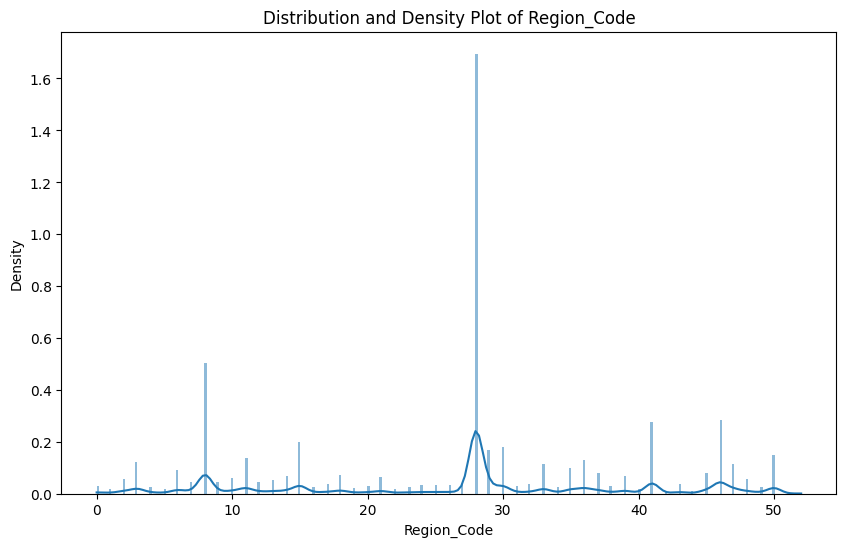

In [14]:
plot_distribution(train, 'Region_Code')

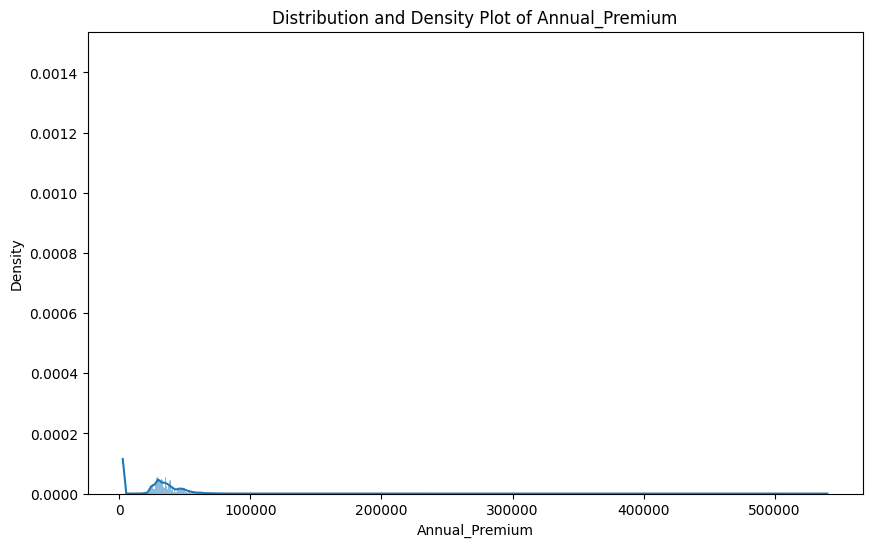

In [15]:
plot_distribution(train, 'Annual_Premium')

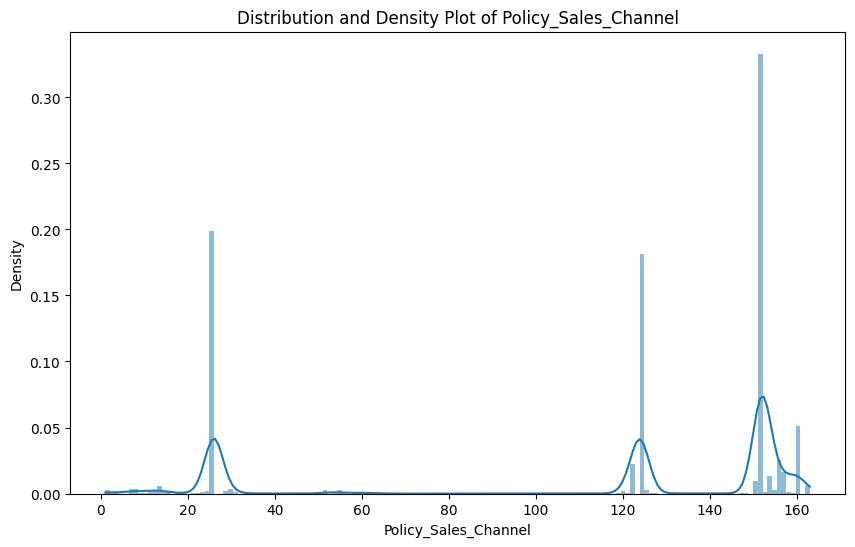

In [16]:
plot_distribution(train, 'Policy_Sales_Channel')

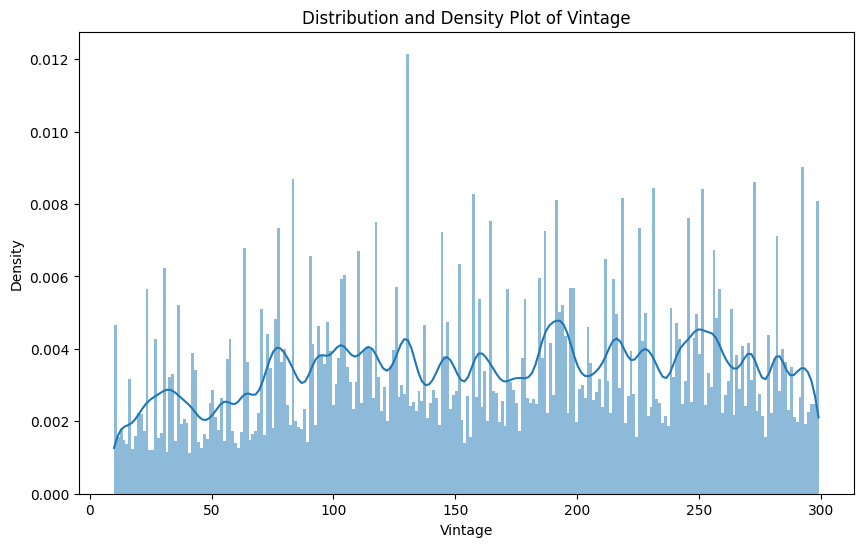

In [17]:
plot_distribution(train, 'Vintage')

In [10]:
# Normalize all non binary numerical features

numerical_columns = ['Age','Region_Code', 'Annual_Premium', 'Policy_Sales_Channel','Vintage']

# Applying QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')

# Fit and transform the data
train[numerical_columns] = qt.fit_transform(train[numerical_columns])

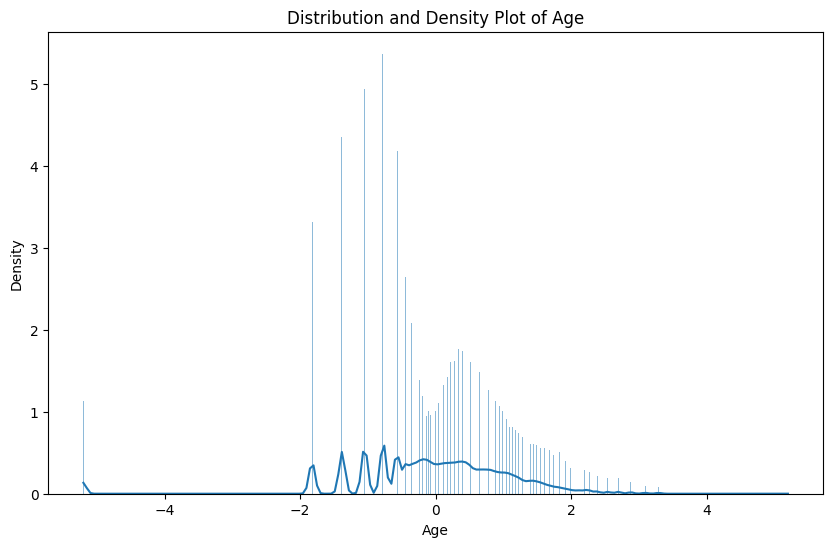

In [19]:
plot_distribution(train, 'Age')

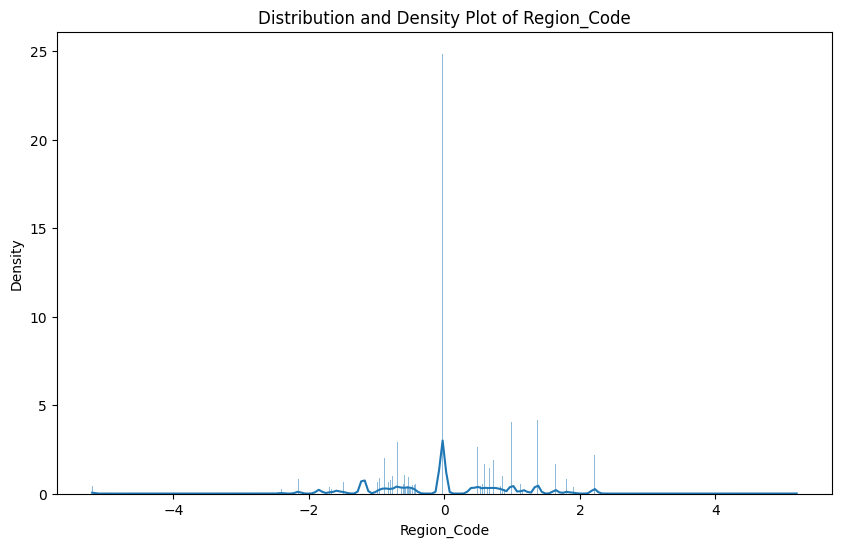

In [20]:
plot_distribution(train, 'Region_Code')

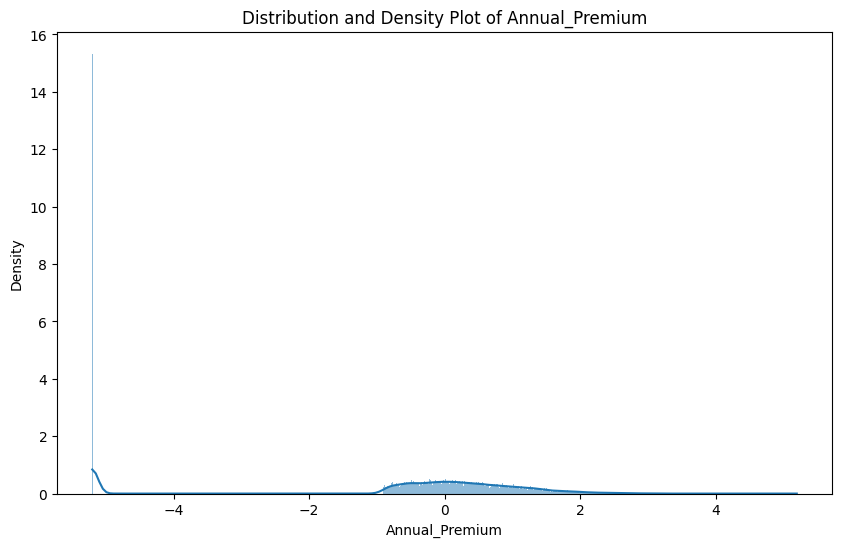

In [21]:
plot_distribution(train, 'Annual_Premium')

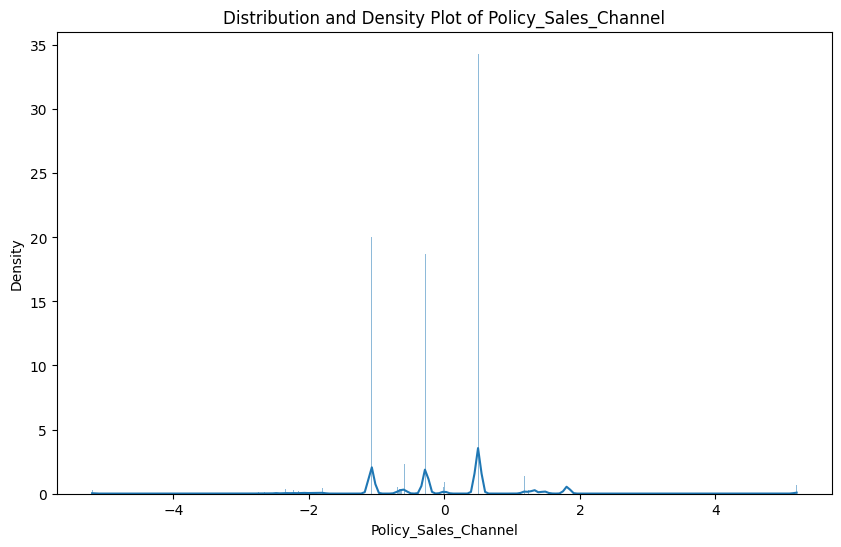

In [22]:
plot_distribution(train, 'Policy_Sales_Channel')

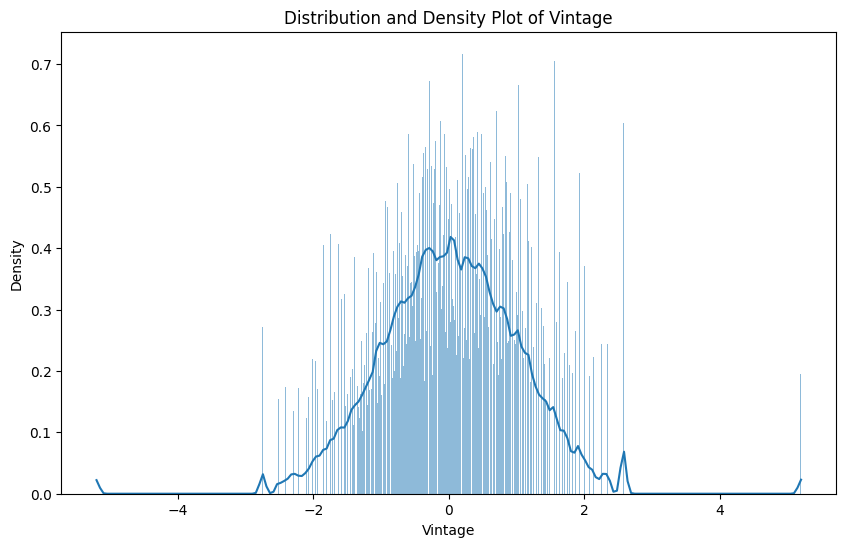

In [23]:
plot_distribution(train, 'Vintage')

In [12]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
id,,,,,,,,,,
11504798,Female,-5.199338,1,1.644369,0,< 1 Year,No,-5.199338,1.798663,0.607463
11504799,Male,0.556927,1,-0.006273,0,1-2 Year,Yes,0.498157,-0.251016,-0.385726
11504800,Male,0.556927,1,1.137677,0,1-2 Year,Yes,-5.199338,-1.053106,1.278137
11504801,Female,-1.355761,1,1.644369,1,< 1 Year,No,-0.747697,0.502074,-0.459820
11504802,Male,0.793602,1,-0.546700,0,1-2 Year,No,0.188388,-0.251016,-0.148584


In [11]:
# save normalized df
train.to_parquet('./data/norm_test.parquet')

In [26]:
# One-hot encode the specified columns
train = pd.get_dummies(train, columns=['Gender', 'Vehicle_Age', 'Vehicle_Damage'])
# teds = pd.get_dummies(teds, columns=['Gender', 'Vehicle_Age', 'Vehicle_Damage'])
# print_boxed_heading("Successfully Encoded
train.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
id,,,,,,,,,,,,,,,
0,-1.824556,1,0.670557,0,2.301567,-0.276998,0.202098,0,False,True,True,False,False,False,True
1,0.340163,1,-0.027604,0,1.940704,-1.077446,1.744448,1,False,True,False,False,True,False,True
2,-0.574595,1,-0.761353,1,0.518764,0.496390,1.002056,0,True,False,False,True,False,True,False
3,-0.037646,1,-2.408550,0,-5.199338,1.321946,-0.933910,0,True,False,True,False,False,False,True
4,-0.001255,1,-0.691121,1,0.011561,0.496390,2.085356,0,True,False,True,False,False,True,False


In [27]:
# =====================================
# | X | Y | of | Train | Data: |
# =====================================
X = train.drop('Response', axis=1)
y = train['Response']

# =====================================
# | Train | Test | Split |  | Data: |
# =====================================
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size=0.1, random_state=42)

# =====================================
# | Shapes |
# =====================================
print(f"Training set shape - X: {X_Train.shape}, y: {Y_Train.shape}")
print(f"Testing set shape - X: {X_Test.shape}, y: {Y_Test.shape}")

Training set shape - X: (10354318, 14), y: (10354318,)
Testing set shape - X: (1150480, 14), y: (1150480,)


In [28]:
# Constants
SEED = 42
N_SPLITS = 20

def train_ml_model(model, X, y, n_splits=N_SPLITS, seed=SEED):
    """
    Trains a given model using Stratified K-Folds cross-validation and calculates the AUC scores.

    Parameters:
    model: The machine learning model to train.
    X: The feature matrix.
    y: The target vector.
    n_splits: The number of splits for cross-validation.
    seed: The random seed for reproducibility.

    Returns:
    model: The trained model.
    train_scores: List of AUC scores for the training sets.
    val_scores: List of AUC scores for the validation sets.
    """
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
    train_scores = []
    val_scores = []

    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        # Splitting data into training and validation sets
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Fitting the model
        model.fit(X_train, y_train)

        # Predicting probabilities for the training and validation sets
        y_train_pred_proba = model.predict_proba(X_train)[:, 1]
        y_val_pred_proba = model.predict_proba(X_val)[:, 1]

        # Calculating AUC scores
        train_auc = roc_auc_score(y_train, y_train_pred_proba)
        val_auc = roc_auc_score(y_val, y_val_pred_proba)

        # Storing the scores
        train_scores.append(train_auc)
        val_scores.append(val_auc)

        # Printing the scores for the current fold
        print(f"Fold {fold}: Train AUC = {train_auc:.4f}, Validation AUC = {val_auc:.4f}")

    # Calculating mean AUC scores
    mean_train_auc = np.mean(train_scores)
    mean_val_auc = np.mean(val_scores)

    # Printing mean AUC scores
    print(f"\nMean Train AUC: {mean_train_auc:.4f}")
    print(f"Mean Validation AUC: {mean_val_auc:.4f}")

    return model, train_scores, val_scores

# with LightGBM
model = LGBMClassifier(random_state=SEED, verbose=-1, device='gpu')
trained_model, train_scores, val_scores = train_ml_model(model, X, y)

Fold 1: Train AUC = 0.8759, Validation AUC = 0.8750
Fold 2: Train AUC = 0.8757, Validation AUC = 0.8757


KeyboardInterrupt: 